<a href="https://colab.research.google.com/github/liang-faan/openpose/blob/master/WorkShop4-LiangFaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Running OpenPose on Google Colab

Forked from: https://colab.research.google.com/github/pamruta/Colab/blob/master/OpenPose.ipynb



### This Colab Notebook demonstrates how to :

- Download and Compile OpenPose in Ubuntu / Colab Environment
- Perform Keypoint extraction using openpose.bin (the OpenPoseDemo executable for Ubuntu)

### Important Notes:
- Run this with the GPU runtime

- Colab has a 6-hour limit on temporary storage. You can Mount Google Drive to copy the files over after building succeeds. The libs will be under the `/content/install/openpose` directory.

- Each Colab Session may use a different GPU model. So the libraries may not be transferable between Colab sessions. If you get error 48 loading the GPU when running `openpose.bin`, that's usually the the problem. To solve this, re-build OpenPose for the session.

Discussion thread: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949#issue-387855863

In [0]:
%tensorflow_version 2.x

In [2]:
# download and install the latest version of cmake
! wget -c "https://github.com/Kitware/CMake/releases/download/v3.14.4/cmake-3.14.4.tar.gz"
! tar xf cmake-3.14.4.tar.gz
! cd cmake-3.14.4 && ./configure && make && sudo make install

Streaming output truncated to the last 5000 lines.
-- Looking for 22 include files stdio.h, ..., idn2.h
-- Looking for 22 include files stdio.h, ..., idn2.h - not found
-- Looking for 22 include files stdio.h, ..., ifaddrs.h
-- Looking for 22 include files stdio.h, ..., ifaddrs.h - found
-- Looking for 23 include files stdio.h, ..., io.h
-- Looking for 23 include files stdio.h, ..., io.h - not found
-- Looking for 23 include files stdio.h, ..., krb.h
-- Looking for 23 include files stdio.h, ..., krb.h - not found
-- Looking for 23 include files stdio.h, ..., libgen.h
-- Looking for 23 include files stdio.h, ..., libgen.h - found
-- Looking for 24 include files stdio.h, ..., locale.h
-- Looking for 24 include files stdio.h, ..., locale.h - found
-- Looking for 25 include files stdio.h, ..., net/if.h
-- Looking for 25 include files stdio.h, ..., net/if.h - found
-- Looking for 26 include files stdio.h, ..., netdb.h
-- Looking for 26 include files stdio.h, ..., netdb.h - found
-- Looking 

In [3]:
# download OpenPose from Git Repository
! git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git

Cloning into 'openpose'...
remote: Enumerating objects: 22330, done.
remote: Total 22330 (delta 0), reused 0 (delta 0), pack-reused 22330
Receiving objects: 100% (22330/22330), 84.30 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (17536/17536), done.


In [4]:
# install dependencies
! cd openpose/scripts/ubuntu && bash ./install_deps.sh && bash ./install_cuda.sh && bash ./install_cudnn.sh
! apt install -y cmake sudo libopencv-dev

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,789 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Rel

In [0]:
# this is just a fix to address few compilation issues
! sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt

In [6]:
! cd openpose && git pull origin master 

From https://github.com/CMU-Perceptual-Computing-Lab/openpose
 * branch              master     -> FETCH_HEAD
Already up to date.


In [7]:
# now the important step - compiling OpenPose with cmake
! /bin/rm -r openpose/build
! /bin/rm -r /content/install/openpose
! mkdir -p /content/install/openpose
! cd openpose && mkdir build && cd build && cmake .. -DCMAKE_INSTALL_PREFIX=/content/install/openpose && cmake --build . &&  cmake --build . --target install

/bin/rm: cannot remove 'openpose/build': No such file or directory
/bin/rm: cannot remove '/content/install/openpose': No such file or directory
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- GCC detected, adding compile flags
-- GCC detected, adding compile flags
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking fo

Testing the openpose demo

In [8]:
!git clone https://github.com/lisaong/hss

Cloning into 'hss'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 551 (delta 57), reused 99 (delta 5), pack-reused 356
Receiving objects: 100% (551/551), 106.27 MiB | 29.65 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [9]:
# run on sample video
! cd openpose && ./build/examples/openpose/openpose.bin --video /content/hss/data/dozing/awake/1.avi --display 0 --disable_blending --write_video /content/output.mp4

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --en

In [10]:
# here is how the output looks like
# isn't it just beautiful?

from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Keypoint Extraction for Workshop 4

This section can be used to run keypoint extraction to get the keypoint files, before continuing on with the rest of workshop 4.

Use this if you don't have a Windows version of OpenPoseDemo.exe to run.


In [11]:
# Try with 1 video first before looping below
!cd openpose && ./build/examples/openpose/openpose.bin --part_candidates --write_json /content/hss/data/dozing/awake/1 --video /content/hss/data/dozing/awake/1.avi --frame_first 20 --frame_step 1 --frame_last 50 --display 0 --disable_blending --render_pose 0

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 3.861271 seconds.


Video - LiangFaan
/content/liangfaan

In [15]:
!mkdir -p /content/liangfaan/output
!cd openpose && ./build/examples/openpose/openpose.bin --part_candidates --write_json /content/liangfaan/output --video /content/LiangFaanShort2.mp4 --frame_first 20 --frame_step 1 --frame_last 50 --display 0 --disable_blending --render_pose 0

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 4.075028 seconds.


Workshop - 4 - LiangFaan

In [0]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
from sklearn.metrics.pairwise import paired_distances

# requires: conda install opencv
import cv2

plt.style.use('seaborn-white')

In [18]:
# load the 200th frame
frame = json.load(open(f'/content/liangfaan/output/LiangFaanShort2_000000000047_keypoints.json', 'rb'))
frame

{'part_candidates': [{'0': [107.146,
    69.9598,
    0.849534,
    411.305,
    73.883,
    0.956145,
    567.816,
    74.8108,
    0.943686,
    215.694,
    76.7864,
    0.750275,
    333.046,
    96.3511,
    0.920879],
   '1': [215.732,
    89.5233,
    0.926057,
    410.383,
    90.484,
    0.945357,
    111.983,
    95.3792,
    0.850591,
    561.045,
    101.258,
    0.844834,
    316.421,
    115.917,
    0.895495],
   '10': [201.063,
    159.963,
    0.889492,
    394.678,
    167.811,
    0.926872,
    96.3343,
    199.087,
    0.827046,
    536.533,
    206.851,
    0.865994,
    289.082,
    246.973,
    0.761916],
   '11': [199.102,
    192.252,
    0.928954,
    387.824,
    198.091,
    0.874726,
    90.4891,
    240.169,
    0.837809,
    528.754,
    242.101,
    0.823794,
    277.34,
    307.665,
    0.726647],
   '12': [225.481,
    127.644,
    0.798476,
    418.217,
    136.474,
    0.88152,
    128.605,
    151.131,
    0.779665,
    575.66,
    160.94,
    0.810

In [19]:
# count how many people
len(frame['people'])

5

In [20]:
# what keypoints are logged for each person
frame['people'][0].keys()

dict_keys(['person_id', 'pose_keypoints_2d', 'face_keypoints_2d', 'hand_left_keypoints_2d', 'hand_right_keypoints_2d', 'pose_keypoints_3d', 'face_keypoints_3d', 'hand_left_keypoints_3d', 'hand_right_keypoints_3d'])

In [21]:
# format is x1, y1, c1, x2, y2, c2, ...
# x, y coordinates with a confidence
frame['people'][0]['pose_keypoints_2d']

[333.046,
 96.3511,
 0.920879,
 316.421,
 115.917,
 0.895495,
 293.973,
 114.971,
 0.822971,
 270.461,
 150.159,
 0.857877,
 276.323,
 173.647,
 0.813811,
 336.017,
 116.902,
 0.808192,
 337.958,
 145.326,
 0.815791,
 346.785,
 168.773,
 0.738649,
 316.436,
 185.374,
 0.73604,
 300.804,
 185.374,
 0.72695,
 289.082,
 246.973,
 0.761916,
 277.34,
 307.665,
 0.726647,
 332.072,
 184.421,
 0.736017,
 349.709,
 239.223,
 0.755798,
 363.434,
 299.802,
 0.773369,
 326.229,
 90.4955,
 0.912333,
 333.097,
 89.5278,
 0.775925,
 311.559,
 92.4435,
 0.824806,
 0,
 0,
 0,
 364.392,
 312.556,
 0.707849,
 372.192,
 309.645,
 0.757814,
 362.408,
 301.804,
 0.584503,
 277.317,
 312.539,
 0.406015,
 274.403,
 313.516,
 0.388196,
 276.355,
 314.498,
 0.512698]

In [0]:
def keypoints_to_dataframe(keypoints):
    """Converts a flat keypoints list (x1, y1, c1, x2, y2, c2) into a pandas DataFrame"""
    return pd.DataFrame({'x': keypoints[::3], 'y': keypoints[1::3], 'c': keypoints[2::3]})

Drawing Skeletons
The keypoints follow the BODY_25 format, which can be used to connect the points to make a skeleton

In [0]:
# Source: https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md#pose-output-format-coco
Pose_part_pairs = [
    (1,8), (1,2), (1,5), (2,3), (3,4), (5,6), (6,7), (8,9), (9,10), (10,11),
    (8,12), (12,13), (13,14), (1,0), (0,15), (15,17), (0,16), (16,18), (2,17), (5,18),
    (14,19), (19,20), (14,21), (11,22), (22,23), (11,24)
]

def draw_skeleton(ax, df):
    for p, q in Pose_part_pairs:
        if df.x[p] != 0 and df.x[q] != 0 and df.y[p] != 0 and df.y[q] != 0:
            ax.plot([df.x[p], df.x[q]], [df.y[p], df.y[q]], color='red')

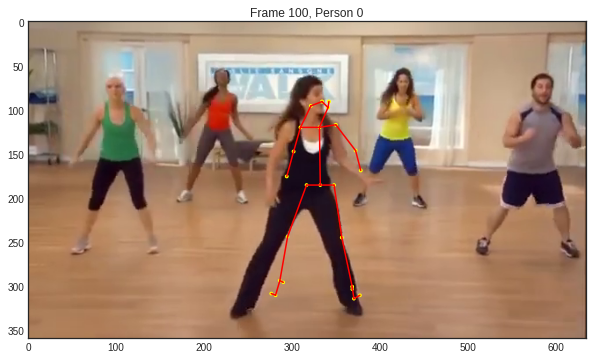

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))

video = cv2.VideoCapture(f'/content/LiangFaanShort2.mp4')

frame = json.load(open(f'/content/liangfaan/output/LiangFaanShort2_000000000020_keypoints.json', 'rb'))
df = keypoints_to_dataframe(frame['people'][0]['pose_keypoints_2d'])

for i in range(100):
    _, image = video.read()
_, image1 = video.read()

# different size dots according to probability
ax.scatter(df.x, df.y, s=df.c*10, color='yellow')
ax.set(title='Frame 100, Person 0')

# openCV uses BGR, convert to RGB
ax.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

draw_skeleton(ax, df)


### Plotting a Scene

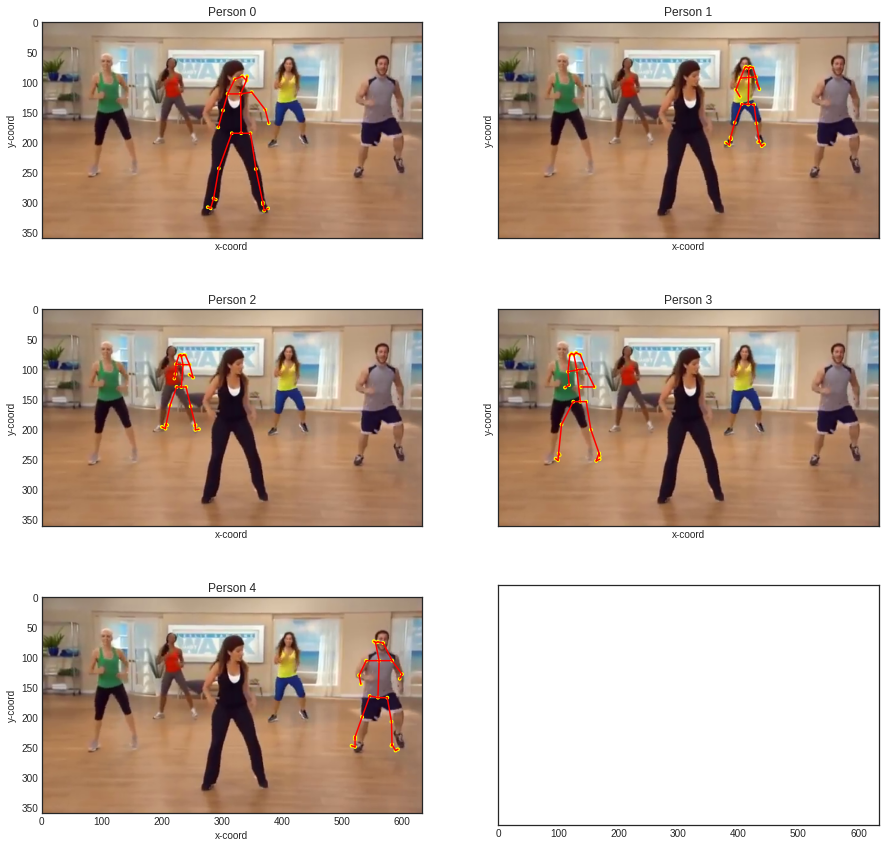

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)
ax = ax.flatten()

video = cv2.VideoCapture(f'/content/LiangFaanShort2.mp4')

# fast forward
for i in range(50):
    _, image = video.read()
_, image = video.read()
    
for i in range(min(len(frame['people']), len(ax))):
    df = keypoints_to_dataframe(frame['people'][i]['pose_keypoints_2d'])
    
    # different size dots according to probability
    ax[i].scatter(df.x, df.y, s=df.c*10, color='yellow')
    ax[i].set(title=f'Person {i}', xlabel='x-coord', ylabel='y-coord')
    
    # openCV uses BGR, convert to RGB
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    draw_skeleton(ax[i], df)

In [0]:
frame1 = json.load(open(f'/content/liangfaan/output/LiangFaanShort2_000000000031_keypoints.json', 'rb'))
frame2 = json.load(open(f'/content/liangfaan/output/LiangFaanShort2_000000000032_keypoints.json', 'rb'))

In [28]:
df1 = keypoints_to_dataframe(frame1['people'][0]['pose_keypoints_2d'])
df1.head()

,x,y,c
0,332.125,96.365,0.921549
1,317.437,118.874,0.892992
2,295.935,119.807,0.772264
3,273.402,148.196,0.739827
4,276.341,160.962,0.685610


In [29]:
df2 = keypoints_to_dataframe(frame2['people'][0]['pose_keypoints_2d'])
df2.head()

,x,y,c
0,332.123,97.2861,0.926256
1,317.431,118.8790,0.892222
2,295.913,119.8100,0.778399
3,272.457,149.1800,0.764492
4,278.298,166.7730,0.690731


In [30]:
def get_centroid(coordinates, threshold=0.1):
    """Computes the centroid of a given 2 dimensional vector"""
    x = coordinates[coordinates.c > threshold].x
    y = coordinates[coordinates.c > threshold].y
    
    return [sum(x)/len(x), sum(y)/len(y)]

get_centroid(df1)

[321.47275, 201.3984]

In [31]:
def get_centroids(frame):
    """Returns the centroid for each person as a list of (x, y) coordinates"""
    return np.array([get_centroid(keypoints_to_dataframe(person['pose_keypoints_2d'])) for person in frame['people']])

get_centroids(frame1)

array([[321.47275   , 201.3984    ],
       [557.61870833, 165.40011667],
       [411.93224   , 136.103872  ],
       [225.45376   , 134.129564  ],
       [122.386552  , 157.045724  ]])

In [0]:
def get_closest_index(centroid, other_frame):
    """Find closest index in other_frame from a given centroid"""
    other_centroids = get_centroids(other_frame)
    return np.argmin(paired_distances(np.ones(other_centroids.shape) * centroid, other_centroids))
    

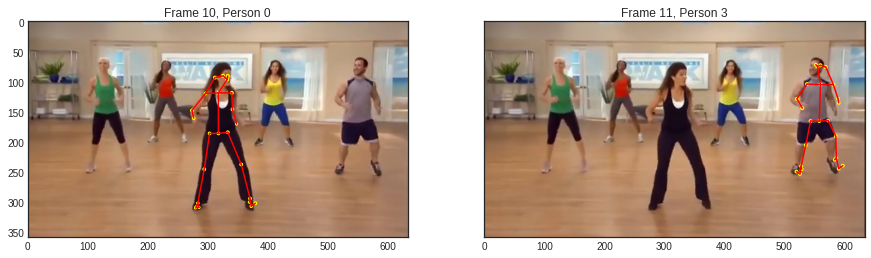

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True, sharey=True)
ax = ax.flatten()

video = cv2.VideoCapture(f'/content/LiangFaanShort2.mp4')

# fast forward
for i in range(10):
    _, image = video.read()
_, image1 = video.read() # frame 10
_, image2 = video.read() # frame 11

df1 = keypoints_to_dataframe(frame1['people'][0]['pose_keypoints_2d'])
ax[0].scatter(df1.x, df1.y, s=df1.c*10, color='yellow')
ax[0].set(title='Frame 10, Person 0')
ax[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
draw_skeleton(ax[0], df1)

df2 = keypoints_to_dataframe(frame2['people'][3]['pose_keypoints_2d'])
ax[1].scatter(df2.x, df2.y, s=df2.c*10, color='yellow')
ax[1].set(title='Frame 11, Person 3')
ax[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
draw_skeleton(ax[1], df2)

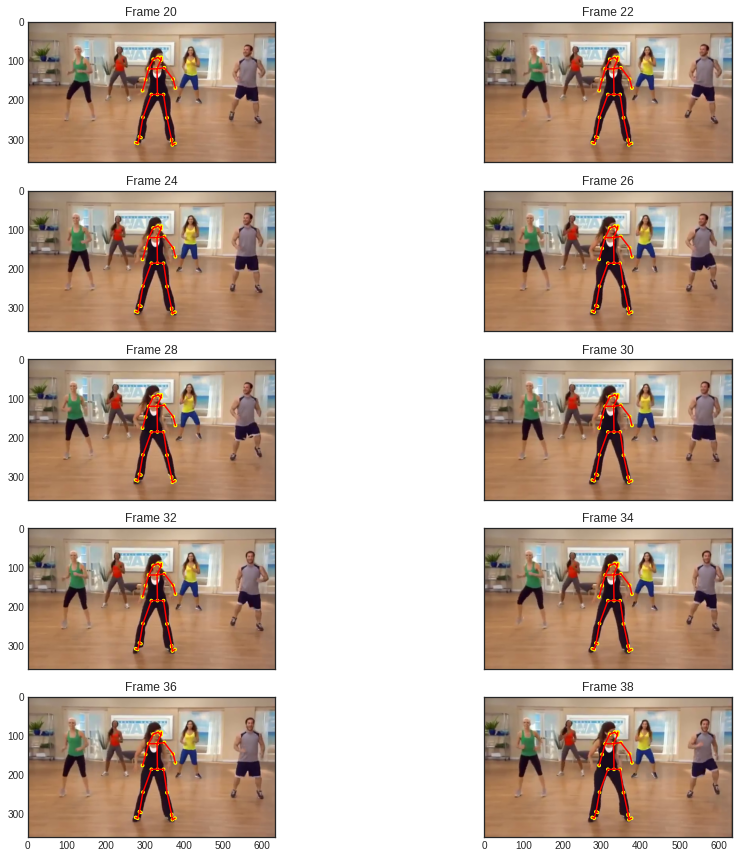

In [58]:
# Extending this further, you should be able to now trace the trajectory of the person
# We will do this every 10 frames

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15), sharex=True, sharey=True)
ax = ax.flatten()

offset = 20
interval = 2

video = cv2.VideoCapture(f'/content/LiangFaanShort2.mp4')

# fast forward
for i in range(offset):
    _, image = video.read()

frame = json.load(open(f'/content/liangfaan/output/LiangFaanShort2_{offset:012d}_keypoints.json', 'rb'))
df = keypoints_to_dataframe(frame['people'][0]['pose_keypoints_2d'])
centroid = get_centroid(df)

for i in range(0, 20, interval):
    _, image = video.read()
        
    frame = json.load(open(f'/content/liangfaan/output/LiangFaanShort2_{offset:012d}_keypoints.json', 'rb'))
    index = get_closest_index(centroid, frame) # find the closest person

    # load keypoints for the closest person
    df = keypoints_to_dataframe(frame['people'][index]['pose_keypoints_2d'])
    
    axis = ax[i//interval]
    axis.scatter(df.x, df.y, s=df.c*10, color='yellow')
    axis.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axis.set(title=f'Frame {offset+i}')
    draw_skeleton(axis, df)
    
    for j in range(interval):
        _, image = video.read() # fast forward
        
    centroid = get_centroid(df) # update centroid since person may have moved

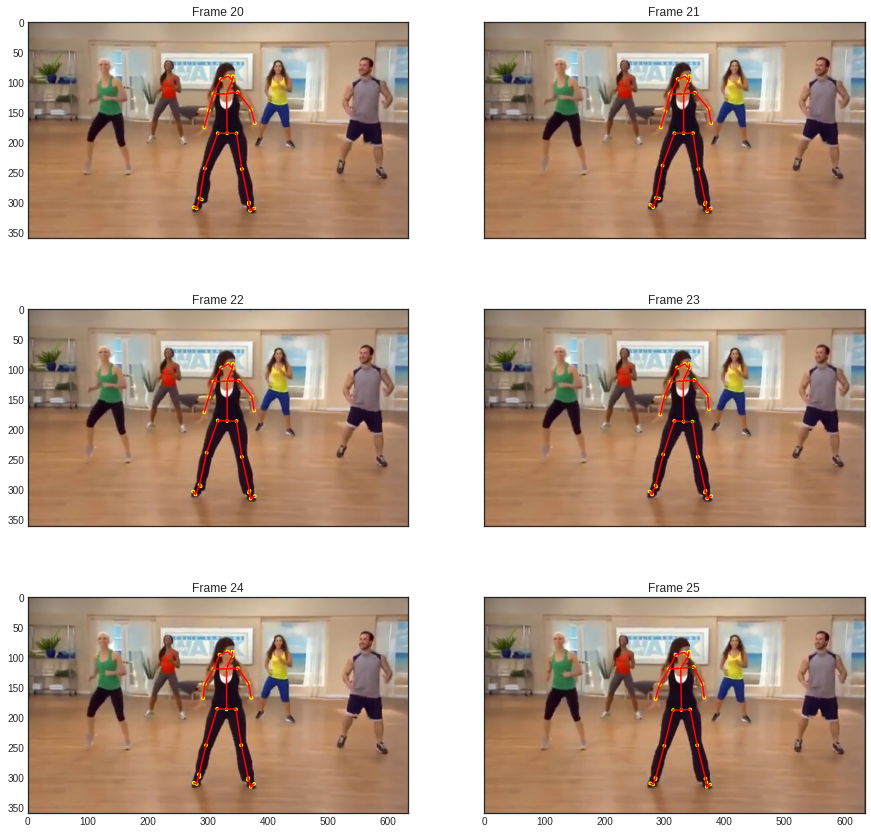

In [46]:
n_frames = 6

# modify this to match your parameters to OpenPoseDemo.exe
offset = 20
interval = 1
end = offset + n_frames*interval
person_index = 0 # select the person you want to track

# Path to the video. avi, mp4 both work
# if you downloaded .webm, you can use an online converter like 
# https://www.online-convert.com/
############# CHANGE BELOW PATH ################
#video_path = r'c:/temp/myvideo.avi' # Windows
video_path='/content/LiangFaanShort2.mp4' # Colab
############# CHANGE ABOVE PATH ################

# keypoints files usually contain the video name as prefix
############# CHANGE BELOW PATH ################
#keypoints_path = r'c:/temp/myvideo/myvideo' # Windows
keypoints_path='/content/liangfaan/output/LiangFaanShort2' # Colab
############# CHANGE ABOVE PATH ################

video = cv2.VideoCapture(video_path)

# fast forward to offset
for i in range(offset):
    _, image = video.read()

frame = json.load(open(f'{keypoints_path}_{offset:012d}_keypoints.json', 'rb'))
df = keypoints_to_dataframe(frame['people'][person_index]['pose_keypoints_2d'])
centroid = get_centroid(df)

# Create the matplotlib axes
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)
ax = ax.flatten()

for i, t in zip(range(n_frames), range(offset, end, interval)):
    _, image = video.read()

    frame = json.load(open(f'{keypoints_path}_{t:012d}_keypoints.json', 'rb'))
    index = get_closest_index(centroid, frame) # find the closest person
    
    # load keypoints for the closest person
    df = keypoints_to_dataframe(frame['people'][index]['pose_keypoints_2d'])
    
    axis = ax[i]
    axis.scatter(df.x, df.y, s=df.c*10, color='yellow')
    axis.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axis.set(title=f'Frame {t}')
    draw_skeleton(axis, df)
    
    centroid = get_centroid(df) # update centroid since person may have moved

####WorkShop 6 -- Liang Faan

In [12]:
import os, glob

############# CHANGE BELOW PATH ################
HSS_DIR = r'/content/hss'
############# CHANGE ABOVE PATH ################

############# CHANGE BELOW PATH ################
OPENPOSE_DIR = r'/content/openpose'
############# CHANGE ABOVE PATH ################

############# CHANGE BELOW EXECUTABLE ################
OPENPOSE_DEMO = './build/examples/openpose/openpose.bin'
############# CHANGE ABOVE PATH ################

classes = ['awake', 'sleep']

frame_first = 20
frame_step = 1
frame_last = 50

cwd = os.getcwd()
os.chdir(OPENPOSE_DIR)
for c in classes:
    data_path = os.path.join(HSS_DIR, 'data', 'dozing', c)
    files = glob.glob(os.path.join(data_path, '*.avi'))
    
    for f in files:
        name, _ = f.split('.')
        input_path = os.path.join(data_path, f)
        output_path = os.path.join(data_path, name)

        # each command should take a few seconds to run
        # if it goes by too fast, then probably some error occurred,
        # try the previous cell to debug
        cmd = f'{OPENPOSE_DEMO} --part_candidates --write_json {output_path} --video {input_path} \
--frame_first {frame_first} --frame_step {frame_step} --frame_last {frame_last} --display 0 --disable_blending --render_pose 0'
        print(cmd)
        os.system(cmd)

os.chdir(cwd)

./build/examples/openpose/openpose.bin --part_candidates --write_json /content/hss/data/dozing/awake/1 --video /content/hss/data/dozing/awake/1.avi --frame_first 20 --frame_step 1 --frame_last 50 --display 0 --disable_blending --render_pose 0
./build/examples/openpose/openpose.bin --part_candidates --write_json /content/hss/data/dozing/awake/3 --video /content/hss/data/dozing/awake/3.avi --frame_first 20 --frame_step 1 --frame_last 50 --display 0 --disable_blending --render_pose 0
./build/examples/openpose/openpose.bin --part_candidates --write_json /content/hss/data/dozing/awake/2 --video /content/hss/data/dozing/awake/2.avi --frame_first 20 --frame_step 1 --frame_last 50 --display 0 --disable_blending --render_pose 0
./build/examples/openpose/openpose.bin --part_candidates --write_json /content/hss/data/dozing/sleep/1 --video /content/hss/data/dozing/sleep/1.avi --frame_first 20 --frame_step 1 --frame_last 50 --display 0 --disable_blending --render_pose 0
./build/examples/openpose/op

All the keypoint files for frames 20-50 should now be in `/content/hss/data/dozing`

In [13]:
!ls -alR /content/hss/data/dozing

/content/hss/data/dozing:
total 16
drwxr-xr-x 4 root root 4096 Mar 28 03:58 .
drwxr-xr-x 9 root root 4096 Mar 28 03:58 ..
drwxr-xr-x 5 root root 4096 Mar 28 03:58 awake
drwxr-xr-x 5 root root 4096 Mar 28 03:58 sleep

/content/hss/data/dozing/awake:
total 2944
drwxr-xr-x 5 root root    4096 Mar 28 03:58 .
drwxr-xr-x 4 root root    4096 Mar 28 03:58 ..
drwxr-xr-x 2 root root    4096 Mar 28 03:58 1
-rw-r--r-- 1 root root  361182 Mar 28 03:58 1.avi
drwxr-xr-x 2 root root    4096 Mar 28 03:59 2
-rw-r--r-- 1 root root 2001936 Mar 28 03:58 2.avi
drwxr-xr-x 2 root root    4096 Mar 28 03:59 3
-rw-r--r-- 1 root root  626586 Mar 28 03:58 3.avi

/content/hss/data/dozing/awake/1:
total 132
drwxr-xr-x 2 root root 4096 Mar 28 03:58 .
drwxr-xr-x 5 root root 4096 Mar 28 03:58 ..
-rw-r--r-- 1 root root 1122 Mar 28 03:58 1_000000000020_keypoints.json
-rw-r--r-- 1 root root 1146 Mar 28 03:58 1_000000000021_keypoints.json
-rw-r--r-- 1 root root 1122 Mar 28 03:58 1_000000000022_keypoints.json
-rw-r--r-- 1 r

You can zip them up by running the following, then downloading the file locally.

In [14]:
!tar zcvf keypoints.tgz /content/hss/data/dozing

tar: Removing leading `/' from member names
/content/hss/data/dozing/
/content/hss/data/dozing/awake/
/content/hss/data/dozing/awake/3/
/content/hss/data/dozing/awake/3/3_000000000049_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000042_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000048_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000037_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000046_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000034_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000035_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000020_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000043_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000031_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000024_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000023_keypoints.json
/content/hss/data/dozing/awake/3/3_000000000030_keypoints.json
/content/hss/data/dozing/awake/3/3_0000000000

Download `keypoints.tgz` to your local machine.

Then continue on with examining the data and training the mdoel in `06_dozing_or_not.ipynb`

Good luck!